In [42]:
import os
import io
import pandas as pd
from google.cloud import storage
import ast
import matplotlib.pyplot as plt

##### accounts_attendance

In [8]:
accounts_attendance = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_attendance.parquet', engine='pyarrow')

In [5]:
accounts_attendance

,id,attendance_date_list,user_id
0,1,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1446852
1,2,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1359398
2,3,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1501542
3,4,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1507767
4,5,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1287453
...,...,...,...
349632,360501,[],897005
349633,360502,"[""2024-05-09""]",1407059
349634,360503,"[""2024-05-09""]",1583727
349635,360504,"[""2024-05-09""]",1392372


In [9]:
accounts_attendance['attendance_date_list'] = accounts_attendance['attendance_date_list'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [11]:
accounts_attendance.explode('attendance_date_list').duplicated(subset=['attendance_date_list','user_id']).sum()

0

##### accounts_blockrecord

In [16]:
accounts_blockrecord = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_blockrecord.parquet', engine='pyarrow')

In [19]:
accounts_blockrecord

,id,reason,created_at,block_user_id,user_id
0,1,그냥...,2023-05-04 23:01:53,867483,878476
1,2,친구 사이가 어색해짐,2023-05-05 01:17:08,867190,867564
2,3,나랑 관련 없는 질문을 자꾸 보냄,2023-05-05 01:50:55,875110,875261
3,6,그냥...,2023-05-05 05:21:52,883696,883511
4,7,그냥...,2023-05-05 06:40:34,871349,870177
...,...,...,...,...,...
19477,25355,사칭 계정,2024-04-05 08:15:03,875351,879416
19478,25356,친구 사이가 어색해짐,2024-04-25 09:28:19,1444256,1292346
19479,25357,친구 사이가 어색해짐,2024-04-25 09:28:24,1379126,1292346
19480,25360,모르는 사람임,2024-05-05 11:06:31,1582869,1583612


In [22]:
accounts_blockrecord.loc[accounts_blockrecord.duplicated(subset=['block_user_id','user_id']) == True]

,id,reason,created_at,block_user_id,user_id
9,13,기타,2023-05-05 13:04:42,885794,879662
10,14,그냥...,2023-05-05 13:04:52,885794,879662
11,15,기타,2023-05-05 13:04:56,885794,879662
12,16,기타,2023-05-05 13:05:01,885794,879662
14,18,친구 사이가 어색해짐,2023-05-05 13:17:26,886605,881070
...,...,...,...,...,...
19227,24885,모르는 사람임,2023-08-15 18:38:38,992181,1072478
19228,24886,모르는 사람임,2023-08-15 18:38:41,992181,1072478
19240,24899,친구 사이가 어색해짐,2023-08-18 12:12:28,1500131,1365572
19248,24912,모르는 사람임,2023-08-21 23:12:23,1029653,955098


##### accounts_failpaymenthistory

In [ ]:
accounts_failpaymenthistory = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_failpaymenthistory.parquet', engine='pyarrow')

##### accounts_friendrequest

In [ ]:
accounts_friendrequest = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_friendrequest.parquet', engine='pyarrow')

##### accounts_group

In [ ]:
accounts_group = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_group.parquet', engine='pyarrow')

##### accounts_nearbyschool

In [ ]:
accounts_nearbyschool = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_nearbyschool.parquet', engine='pyarrow')

##### accounts_paymenthistory

In [ ]:
accounts_paymenthistory = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_paymenthistory.parquet', engine='pyarrow')

##### accounts_user_contacts

In [ ]:
accounts_user_contacts = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_user_contacts.parquet', engine='pyarrow')

##### accounts_pointhistory

In [ ]:
accounts_pointhistory = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_pointhistory.parquet', engine='pyarrow')

##### accounts_school

In [ ]:
accounts_school = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_school.parquet', engine='pyarrow')

##### accounts_timelinereport

In [ ]:
accounts_timelinereport = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_timelinereport.parquet', engine='pyarrow')

##### accounts_user

In [ ]:
accounts_user = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_user.parquet', engine='pyarrow')

##### accounts_userquestionrecord

In [ ]:
accounts_userquestionrecord = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_userquestionrecord.parquet', engine='pyarrow')

##### accounts_userwithdraw

In [ ]:
accounts_userwithdraw = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_userwithdraw.parquet', engine='pyarrow')

##### event_receipts

In [ ]:
event_receipts = pd.read_parquet('gs://sprintda05_final_project/votes/event_receipts.parquet', engine='pyarrow')

##### events

In [ ]:
events = pd.read_parquet('gs://sprintda05_final_project/votes/events.parquet', engine='pyarrow')

##### polls_question

In [43]:
polls_question = pd.read_parquet('gs://sprintda05_final_project/votes/polls_question.parquet', engine='pyarrow')

In [52]:
polls_question

,id,question_text,created_at
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53
1,100,"""이 사람으로 한 번 살아보고 싶다"" 하는 사람은?",2023-03-31 15:22:53
2,101,미래의 틱톡커는?,2023-03-31 15:22:54
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55
...,...,...,...
5020,5129,나에게 가장 중요한 사람은?,2023-06-06 06:15:52
5021,5130,오목을 제일 잘 할 것 같은 사람은?,2023-06-06 06:15:52
5022,5131,가방에서 쓰레기가 안 나올 것 같은 사람은?,2023-06-06 06:15:52
5023,5132,아무리 많은 숙제도 30분만에 다 끝내버릴 수 있을 것 같은 친구는?,2023-06-06 06:15:52


In [30]:
hour = polls_question['created_at'].dt.hour

In [35]:
polls_question.loc[polls_question['created_at'].dt.hour == 3]

,id,question_text,created_at
462,561,얘랑 친해지면 세상 모두랑 친해질 수 있을 것 같았던 사람은?,2023-05-04 03:36:37


In [38]:
hour.value_counts()

created_at
6     1966
8     1523
14     732
13     250
5      235
15     164
11     154
3        1
Name: count, dtype: int64

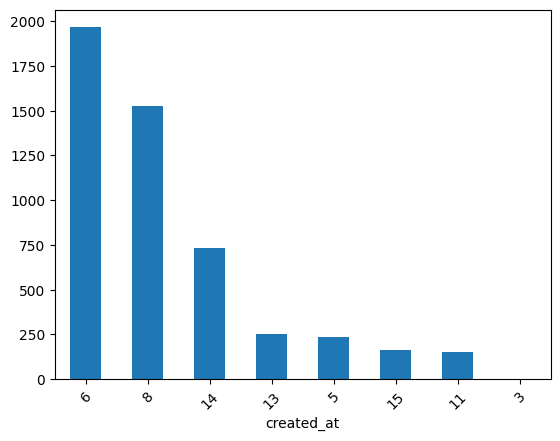

In [ ]:
hour.value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [60]:
polls_question.loc[polls_question['id'].isin([170,169,186,211,290])]

,id,question_text,created_at
70,169,축제에서 공연을 제일 잘 할거 같은 사람은?,2023-03-31 15:23:29
71,170,처음 보는 사람과 가장 빨리 친해질 것 같은 사람은?,2023-03-31 15:23:30
87,186,vote,2023-04-01 11:09:15
112,211,앞으로의 인생을 가장 재미있게 살것 같은 사람은?,2023-04-01 11:09:20
191,290,모든 사람과 잘 지낼 것 같은 사람은?,2023-04-01 11:09:35


In [30]:
polls_question.loc[polls_question['id']==111]

,id,question_text,created_at
12,111,마스크가 잘 어울리는 사람은?,2023-03-31 15:22:59


In [26]:
df = pd.merge(polls_question,report,how='left',on='id')

In [36]:
df1 = df[df['question_text'].str.contains('vote',case=False)]

In [74]:
df2 = pd.merge(df1,piece_count,how='left',on='id') 
df2

,id,question_text,created_at,count,count1
0,186,vote,2023-04-01 11:09:15,45.0,1991.0
1,483,vote,2023-05-02 05:33:11,73.0,1615.0
2,639,vote,2023-05-11 15:52:44,16.0,580.0
3,696,vote,2023-05-15 13:58:24,34.0,411.0
4,712,vote,2023-05-15 13:58:30,15.0,381.0
5,725,vote,2023-05-15 13:58:35,7.0,392.0
6,736,vote,2023-05-15 13:58:40,32.0,358.0
7,807,vote,2023-05-15 13:59:11,34.0,357.0
8,881,vote,2023-05-15 13:59:44,39.0,365.0
9,940,vote,2023-05-15 14:00:10,20.0,333.0


In [81]:
vote_text = df2['id'].to_list()

In [28]:
polls_question[polls_question['question_text'].str.contains('vote', case=False)].head(5)

,id,question_text,created_at
87,186,vote,2023-04-01 11:09:15
384,483,vote,2023-05-02 05:33:11
540,639,vote,2023-05-11 15:52:44
587,696,vote,2023-05-15 13:58:24
603,712,vote,2023-05-15 13:58:30


##### polls_questionpiece

In [44]:
polls_questionpiece = pd.read_parquet('gs://sprintda05_final_project/votes/polls_questionpiece.parquet', engine='pyarrow')

In [15]:
polls_questionpiece

,id,is_voted,created_at,question_id,is_skipped
0,998458,1,2023-04-28 12:27:22,252,0
1,998459,1,2023-04-28 12:27:22,244,0
2,998460,1,2023-04-28 12:27:22,183,0
3,998461,1,2023-04-28 12:27:22,101,0
4,998462,1,2023-04-28 12:27:22,209,0
...,...,...,...,...,...
1265471,208385226,0,2024-05-07 11:32:30,960,0
1265472,208385227,0,2024-05-07 11:32:30,1402,0
1265473,208385228,0,2024-05-07 11:32:30,1676,0
1265474,208385229,0,2024-05-07 11:32:30,3115,0


In [49]:
piece_count = polls_questionpiece.groupby(['question_id'])[['id']].count().sort_values(by='id',ascending=False).reset_index().rename(columns={'id' : 'count1','question_id': 'id'})

In [63]:
piece_count


,id,count1
0,170,2030
1,290,2021
2,169,2017
3,211,2009
4,186,1991
...,...,...
4939,4926,1
4940,4556,1
4941,4551,1
4942,4931,1


In [51]:
piece_count.describe()

,id,count1
count,4944.000000,4944.000000
mean,2587.901699,255.961974
std,1441.905349,478.950128
min,99.000000,1.000000
25%,1344.750000,14.000000
50%,2580.500000,33.000000
75%,3816.250000,355.000000
max,5133.000000,2030.000000


In [87]:
vote_questionpiece = polls_questionpiece.loc[polls_questionpiece['question_id'].isin(vote_text),'id'].to_list()

##### polls_questionreport

In [45]:
polls_questionreport = pd.read_parquet('gs://sprintda05_final_project/votes/polls_questionreport.parquet', engine='pyarrow')

In [41]:
polls_questionreport

,id,reason,created_at,question_id,user_id
0,1,이 질문은 재미없어요,2023-04-19 06:20:35,250,837556
1,2,이 질문은 재미없어요,2023-04-19 06:58:09,113,837672
2,3,불쾌한 내용이 포함되어 있음,2023-04-19 06:58:17,113,837672
3,4,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:42,119,837922
4,5,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:50,119,837922
...,...,...,...,...,...
51419,55763,그냥 싫어,2024-04-19 12:49:57,350,1542237
51420,55764,그냥 싫어,2024-04-19 12:50:02,3541,1542237
51421,55765,그냥 싫어,2024-04-28 06:35:38,392,984791
51422,55766,그냥 싫어,2024-04-30 04:48:25,4979,1583634


In [65]:
polls_questionreport.groupby(['question_id'])[['id']].count().reset_index().rename(columns={'id': 'count'}).sort_values(by='count', ascending=False)

,question_id,count
12,111,988
311,410,803
299,398,660
325,424,533
206,305,493
...,...,...
2439,2980,1
1801,2019,1
2441,2983,1
2443,2986,1


In [ ]:
polls_questionreport.loc[polls_questionreport['question_id']==111]

In [60]:
report = polls_questionreport.groupby(['question_id'])[['id']].count().reset_index().rename(columns={'id' : 'count', 'question_id': 'id'}).sort_values(by='count',ascending=False)

In [64]:
report.head(5) 

,id,count
12,111,988
311,410,803
299,398,660
325,424,533
206,305,493


In [ ]:
report.describe()

,id,count
count,3135.000000,3135.000000
mean,1921.597448,16.403190
std,1231.248878,38.455215
min,99.000000,1.000000
25%,892.500000,1.000000
50%,1682.000000,4.000000
75%,2849.000000,19.000000
max,5110.000000,988.000000


##### polls_questionset

In [66]:
polls_questionset = pd.read_parquet('gs://sprintda05_final_project/votes/polls_questionset.parquet', engine='pyarrow')

In [68]:
polls_questionset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158384 entries, 0 to 158383
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      158384 non-null  int64         
 1   question_piece_id_list  158384 non-null  object        
 2   opening_time            158384 non-null  datetime64[ns]
 3   status                  158384 non-null  object        
 4   created_at              158384 non-null  datetime64[ns]
 5   user_id                 158384 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 7.3+ MB


In [71]:
polls_questionset['question_piece_id_list'] =  polls_questionset['question_piece_id_list'].map(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [84]:
polls_questionset

,id,question_piece_id_list,opening_time,status,created_at,user_id
0,99817,"[998458, 998459, 998460, 998461, 998462, 99846...",2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
1,99830,"[998588, 998589, 998590, 998591, 998592, 99859...",2023-04-28 12:28:07,F,2023-04-28 12:28:07,849438
2,99840,"[998689, 998691, 998693, 998695, 998697, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,847375
3,99841,"[998688, 998690, 998692, 998694, 998696, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,849446
4,99848,"[998768, 998769, 998770, 998771, 998772, 99877...",2023-04-28 12:28:57,F,2023-04-28 12:28:57,849477
...,...,...,...,...,...,...
158379,20838253,"[208383291, 208383292, 208383293, 208383294, 2...",2024-05-05 14:46:27,C,2024-05-05 14:06:27,1251933
158380,20838344,"[208384201, 208384202, 208384203, 208384204, 2...",2024-05-06 11:38:20,C,2024-05-06 10:58:20,876072
158381,20838419,"[208384951, 208384952, 208384953, 208384954, 2...",2024-05-07 00:55:00,C,2024-05-07 00:15:00,1208878
158382,20838445,"[208385211, 208385212, 208385213, 208385214, 2...",2024-05-07 12:09:08,C,2024-05-07 11:29:08,1001607


In [82]:
explode_questionset = polls_questionset.explode('question_piece_id_list')

In [88]:
explode_questionset.loc[explode_questionset['question_piece_id_list'].isin(vote_questionpiece)]

,id,question_piece_id_list,opening_time,status,created_at,user_id
11,99877,999061,2023-04-28 12:30:30,F,2023-04-28 12:30:30,849452
47,100144,1001728,2023-04-28 13:27:10,F,2023-04-28 12:37:10,849446
82,100659,1006883,2023-04-28 13:49:51,F,2023-04-28 12:59:52,849464
102,100956,1009852,2023-04-28 14:05:03,F,2023-04-28 13:15:03,850006
179,101876,1019049,2023-04-28 13:57:38,F,2023-04-28 13:57:38,849535
...,...,...,...,...,...,...
158367,20834940,208350163,2024-03-17 09:05:21,O,2024-03-17 08:25:21,1165963
158368,20835030,208351069,2024-03-18 15:35:54,C,2024-03-18 14:55:54,1260879
158375,20836712,208367887,2024-04-18 03:03:30,O,2024-04-18 02:23:30,1087583
158379,20838253,208383297,2024-05-05 14:46:27,C,2024-05-05 14:06:27,1251933


##### polls_usercandidate

In [ ]:
polls_usercandidate = pd.read_parquet('gs://sprintda05_final_project/votes/polls_usercandidate.parquet', engine='pyarrow')